<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/Natural_Lanaguage_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP and Naive Bayes

### Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Load the Dataset

In [ ]:
df=pd.read_csv('/content/blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df.sample(10)

,Data,Labels
749,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,rec.autos
1485,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,sci.space
831,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,rec.motorcycles
68,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,alt.atheism
1627,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.politics.guns
584,Newsgroups: comp.windows.x\nPath: cantaloupe.s...,comp.windows.x
609,Xref: cantaloupe.srv.cs.cmu.edu rec.photo:5855...,misc.forsale
552,Newsgroups: comp.windows.x\nPath: cantaloupe.s...,comp.windows.x
1234,Newsgroups: sci.electronics\nPath: cantaloupe....,sci.electronics
824,Xref: cantaloupe.srv.cs.cmu.edu rec.motorcycle...,rec.motorcycles


In [ ]:
df.nunique()

,0
Data,2000
Labels,20


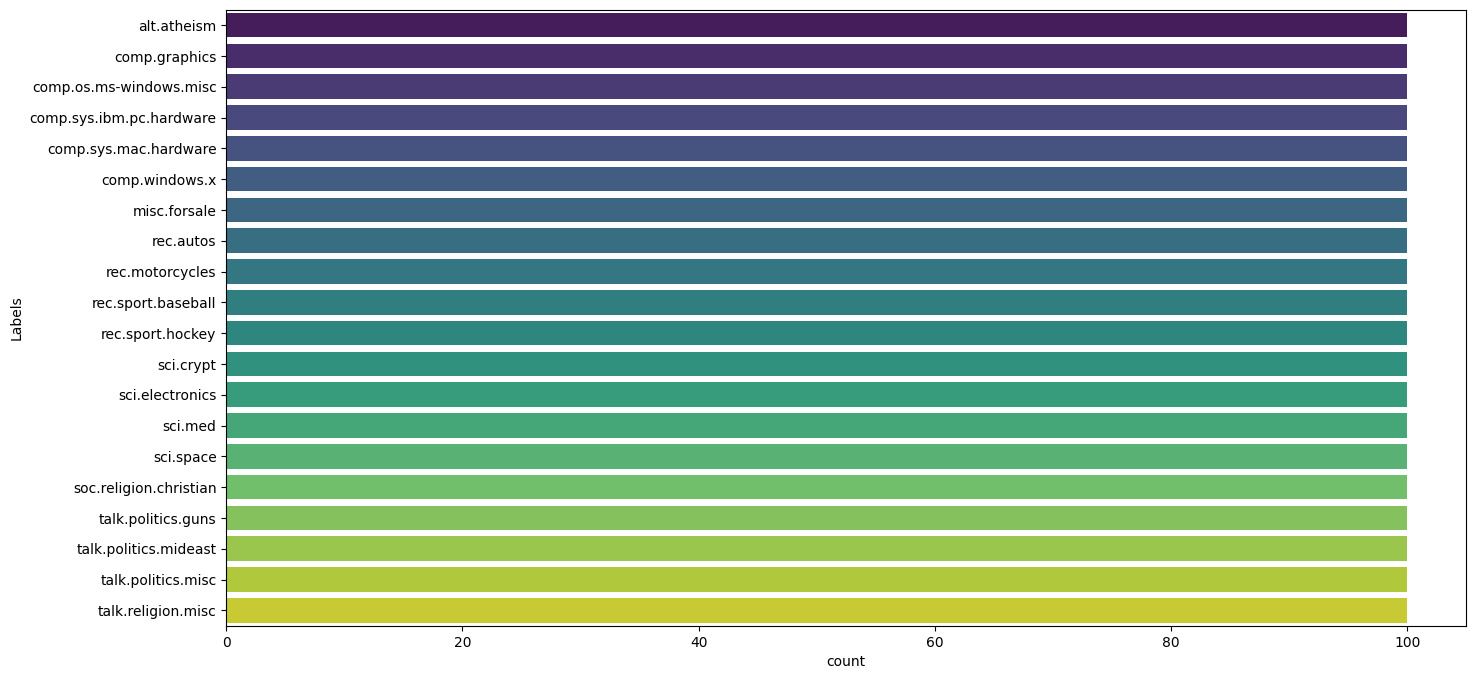

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(df['Labels'],palette="viridis")
plt.show()

In [ ]:
df["Labels"].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


There is  no imbalance in the dataset.

### Pre-processing

In [ ]:
import re
import string
def clean(text):
  #remove newlines
  text=re.sub(r"\n"," ",text)

  #remove urls and emails
  text=re.sub(r'\b(?:https?|ftp):\/\/[^\s]+',' ',text) #removes urls
  text=re.sub(r'\b\w+@\w+\.\w+'," ",text) # removes email addresses

  #remove numbers
  text=re.sub(r'\d+'," ",text)

  # Remove non-alphanumeric characters (punctuation) except spaces
  text = re.sub(f'[{string.punctuation}]', ' ', text)

  #remove extra spaces
  text=re.sub(r'\s+'," ",text).strip()

  return text


Lets preprocess the data, by applying the clean function to the text column. which removes the unwanted characters.

In [ ]:
df["Data"]=df["Data"].apply(clean)
df.head()

,Data,Labels
0,Path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
1,Newsgroups alt atheism Path cantaloupe srv cs ...,alt.atheism
2,Path cantaloupe srv cs cmu edu das news harvar...,alt.atheism
3,Path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
4,Xref cantaloupe srv cs cmu edu alt atheism tal...,alt.atheism


### Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Download necessary NLTK datasets
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Lets apply lemmatization to the data. Which reduces the words to their base form.

In [ ]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define function for Lemmatization
def lemmatize_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

In [ ]:
# Example usage
df["Data"] = df["Data"].apply(lemmatize_text)
df.head()

,Data,Labels
0,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
1,Newsgroups alt atheism Path cantaloupe srv c c...,alt.atheism
2,Path cantaloupe srv c cmu edu da news harvard ...,alt.atheism
3,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
4,Xref cantaloupe srv c cmu edu alt atheism talk...,alt.atheism


In [ ]:
cv_df=df.copy()

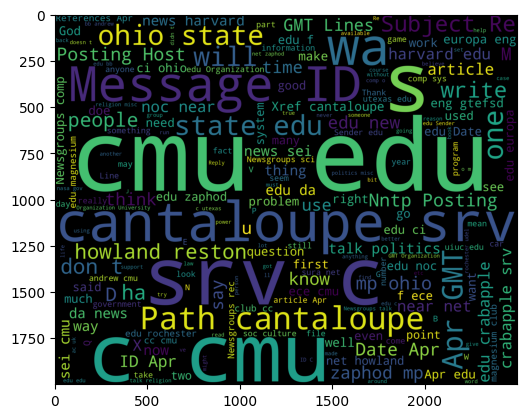

In [ ]:
from wordcloud import WordCloud

wordcloud_stw = WordCloud( background_color= 'black',
                width = 2500,
                height = 2000).generate(" ".join(df["Data"]))
plt.imshow(wordcloud_stw)

The word cloud shows the most frequent words in the dataset.

### Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

cv_train,cv_test = train_test_split(cv_df,test_size=0.3,random_state=2)

In [ ]:
def split_into_words(i):
    return (i.split(" "))

Apply both count vectorization and tf-idf on the data. And then apply naive bayes on both of them.To get the best accuracy.

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv=CountVectorizer(
                   stop_words='english',lowercase=True,
                   strip_accents='unicode',analyzer=split_into_words)

#fit CountVectorization
cv.fit(cv_train["Data"])

CountVectorizer(analyzer=<function split_into_words at 0x7d307a530360>,
                stop_words='english', strip_accents='unicode')

In [ ]:
cv_train_features=cv.transform(cv_train["Data"])
cv_test_features=cv.transform(cv_test["Data"])

In [ ]:
print(cv_train_features.shape)
print(cv_test_features.shape)


(1400, 34957)
(600, 34957)


In [ ]:
train_data_cv=pd.DataFrame(cv_train_features.toarray(),columns=cv.get_feature_names_out())
train_data_cv.head()

,,A,AA,AAA,AAAAARRRRGH,AAN,AAP,AAUwpIUGyV,AAVI,AAWZ,...,zuma,zurich,zwaartepunten,zwak,zwakke,zware,zwarte,zxmkr,zy,zzD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
import numpy as np

# Initialize the Multinomial Naive Bayes classifier
classifier_mb = MB()

# Train the classifier
classifier_mb.fit(cv_train_features, cv_train["Labels"])


# Test predictions and accuracy
test_pred_m = classifier_mb.predict(cv_test_features)
accuracy_test_m = np.mean(test_pred_m == cv_test["Labels"])
print(f'Test Accuracy: {accuracy_test_m * 100:.2f}%')


Test Accuracy: 71.17%


The accuracy after applying Naïve Bayes with Count Vectorization was 71.17%. Now, let's apply TF-IDF and compare the results.

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer (using same parameters as CountVectorizer)
tfidf = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',
    analyzer=split_into_words  # Make sure this is defined as you did in CountVectorizer
)

# Fit and transform the training data
tfidf.fit(cv_train["Data"])

# Transform the training and test data
tfidf_train_features = tfidf.transform(cv_train["Data"])
tfidf_test_features = tfidf.transform(cv_test["Data"])

# Print the shape of the transformed features to see the dimensionality
print(tfidf_train_features.shape)
print(tfidf_test_features.shape)


(1400, 34957)
(600, 34957)


### Applying Naive Bayes

In [ ]:

# Initialize the Multinomial Naive Bayes classifier
classifier_mb_tfidf = MB()

# Train the classifier using TF-IDF features
classifier_mb_tfidf.fit(tfidf_train_features, cv_train["Labels"])

# Test predictions and accuracy
test_pred_m = classifier_mb_tfidf.predict(tfidf_test_features)
accuracy_test_m = np.mean(test_pred_m == cv_test["Labels"])
print(f'Test Accuracy: {accuracy_test_m * 100:.2f}%')


Test Accuracy: 80.50%


After applying Naive Bayes with TF-IDF, we obtained an accuracy of 80.50%. This indicates that Naive Bayes classifies the data more effectively using TF-IDF for this dataset.

### Sentiment Analysis

In [ ]:
!pip install afinn
from afinn import Afinn
afinn = Afinn()

# Define function to get sentiment score using AFINN
def get_afinn_sentiment(text):
    return afinn.score(text)

# Apply AFINN sentiment analysis to the lemmatized text
df['Afinn_Sentiment'] = df['Data'].apply(get_afinn_sentiment)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=7e131097b53067c1c378eb73e42e097a8237f1e6d0413baa879208256aa7c2ee
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [ ]:
def classify_afinn_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['Afinn_Sentiment_Class'] = df['Afinn_Sentiment'].apply(classify_afinn_sentiment)

In [ ]:
df.head()

,Data,Labels,Afinn_Sentiment,Afinn_Sentiment_Class
0,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism,-17.0,negative
1,Newsgroups alt atheism Path cantaloupe srv c c...,alt.atheism,8.0,positive
2,Path cantaloupe srv c cmu edu da news harvard ...,alt.atheism,-29.0,negative
3,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism,-130.0,negative
4,Xref cantaloupe srv c cmu edu alt atheism talk...,alt.atheism,8.0,positive


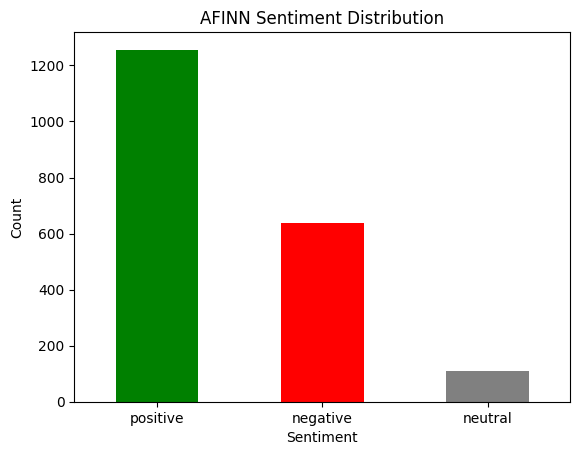

In [ ]:
# Count the number of positive, negative, and neutral sentiments
afinn_sentiment_counts = df['Afinn_Sentiment_Class'].value_counts()

# Plot
afinn_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('AFINN Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The sentiment analysis results reveal that the majority of the blog posts have a positive sentiment (1300 posts), followed by negative sentiment (600 posts), and a relatively small number of neutral posts (100).

In [ ]:
x=df["Afinn_Sentiment_Class"] == 'negative'
df["Data"][x]

,Data
0,Path cantaloupe srv c cmu edu magnesium club c...
2,Path cantaloupe srv c cmu edu da news harvard ...
3,Path cantaloupe srv c cmu edu magnesium club c...
6,Newsgroups alt atheism Path cantaloupe srv c c...
11,Xref cantaloupe srv c cmu edu alt atheism talk...
...,...
1987,Xref cantaloupe srv c cmu edu talk religion mi...
1989,Xref cantaloupe srv c cmu edu alt conspiracy t...
1991,Xref cantaloupe srv c cmu edu alt atheism talk...
1993,Xref cantaloupe srv c cmu edu alt conspiracy a...


These texts have been classified as negative due to their argumentative tone, dismissive language, and controversial topics. Words like **"hogwash,"** **"bunk,"** and **"bullshit"** contribute to negativity by expressing skepticism or outright rejection of opposing views. Additionally, discussions around **war casualties**, **religious debates,** and **scientific disputes** often provoke strong emotions, making the sentiment more negative. The presence of **sarcasm and adversarial phrasing** further reinforces the classification.

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate the evaluation metrics
accuracy = accuracy_score(cv_test["Labels"], test_pred_m)
precision = precision_score(cv_test["Labels"], test_pred_m, average='weighted')
recall = recall_score(cv_test["Labels"], test_pred_m, average='weighted')
f1 = f1_score(cv_test["Labels"], test_pred_m, average='weighted')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Print the DataFrame
results_df

,Metric,Value
0,Accuracy,0.805000
1,Precision,0.854721
2,Recall,0.805000
3,F1 Score,0.813422




The model demonstrates a good overall performance with an accuracy of 80.5%, indicating that it correctly classifies 80.5% of the blog posts in the test set.  The precision of 85.5% suggests that when the model predicts a certain label, it's correct about 85.5% of the time.  The recall, also at 80.5%, shows that the model correctly identifies 80.5% of all actual instances of each label. The F1 score of 81.3% is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.  Since precision and recall are relatively close to each other, it indicates a reasonable balance between correctly identifying positive instances and minimizing false positives.  Overall, these metrics point to a well-performing model, particularly given that the accuracy from the Count Vectorizer method was lower at 71.17%, and the TF-IDF method shows substantial improvement.
